<a href="https://colab.research.google.com/github/anniemajella/jenkins/blob/main/DL_2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd

In [ ]:
#Reading the dataset
data=pd.read_csv('/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Drop the null values
data=data.dropna()
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df=data[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1


In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(data['gender'])
df['ever_married']=le.fit_transform(data['ever_married'])
df['work_type']=le.fit_transform(data['work_type'])
df['Residence_type']=le.fit_transform(data['Residence_type'])
df['smoking_status']=le.fit_transform(data['smoking_status'])
df.head()

<ipython-input-6-086dc6b770f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=le.fit_transform(data['gender'])
<ipython-input-6-086dc6b770f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married']=le.fit_transform(data['ever_married'])
<ipython-input-6-086dc6b770f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0,1,228.69,36.6,1,1,1,2,1,1
2,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,79.0,1,0,174.12,24.0,1,0,1,3,0,2
5,81.0,0,0,186.21,29.0,1,1,1,2,1,1


In [ ]:
data.shape,df.shape
y=df['stroke']
x=df.drop('stroke',axis=1)
x.shape,y.shape

((4909, 10), (4909,))

Text(0.5, 1.0, 'COUNT PLOT')

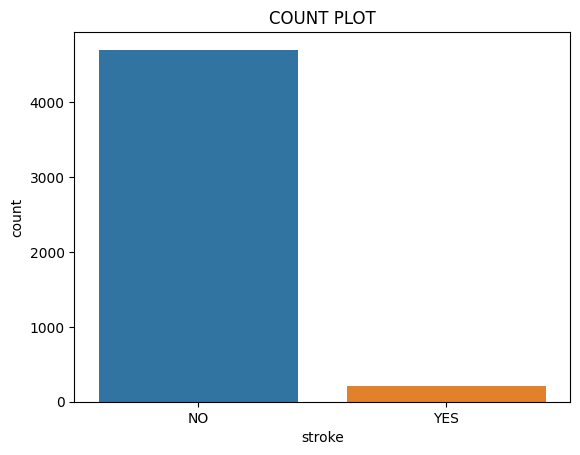

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df,x='stroke')
plt.xticks([0,1],['NO','YES'])
plt.title('COUNT PLOT')

In [ ]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)


In [ ]:
#Building an ANN model
import tensorflow as tf
from tensorflow.keras.layers import Dense
ann = tf.keras.Sequential()
ann.add(Dense(units=25, activation='relu'))
ann.add(Dense(units=25,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile('adam','binary_crossentropy',metrics=['accuracy'])
#'binary_crossentropy' as the loss function
# "sigmoid" for binary classification

In [ ]:
#Fitting the ANN model
result=ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
123/123 [==============================] - 7s 3ms/step - loss: 1.0720 - accuracy: 0.8826
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 0.2045 - accuracy: 0.9468
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1891 - accuracy: 0.9539
Epoch 4/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1792 - accuracy: 0.9547
Epoch 5/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1767 - accuracy: 0.9544
Epoch 6/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1791 - accuracy: 0.9544
Epoch 7/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1745 - accuracy: 0.9537
Epoch 8/10
123/123 [==============================] - 1s 5ms/step - loss: 0.1729 - accuracy: 0.9534
Epoch 9/10
123/123 [==============================] - 1s 4ms/step - loss: 0.1729 - accuracy: 0.9549
Epoch 10/10
123/123 [==============================] - 1s 5ms/step - loss: 0.1787 - accuracy: 0.9531

In [ ]:
y_pred=[]
for i in ann.predict(x_test):
  if i>0.5:
    y_pred.append(1)
  if i<0.5:
    y_pred.append(0)

31/31 [==============================] - 0s 2ms/step


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[937,   6],
       [ 38,   1]])

In [ ]:
#Displaying the Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy


0.955193482688391

#Regression

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Dataset/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df= pd.get_dummies(df)

In [ ]:
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
x= df.drop(['price'], axis=1)
y= df.price

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape

(143, 200)

In [ ]:
from keras import backend as k
def r2(y_true,y_pred):
  ss_res = k.sum(k.square(y_true-y_pred))
  ss_tot = k.sum(k.square(y_true-k.mean(y_true)))
  return (1-ss_res/(ss_tot))

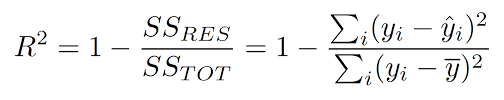

In [ ]:
#Model Creation
model=Sequential()
model.add(Dense(400,activation='relu',input_dim=200))
model.add(Dense(240,activation='relu'))
model.add(Dense(1))

In [ ]:
#Model Compilation
model.compile(optimizer='Adam',loss='mean_absolute_error',metrics=[r2])

In [ ]:
hist = model.fit(x_train,y_train,epochs=150, batch_size=5, validation_split=0.3)

<Axes: xlabel='index'>

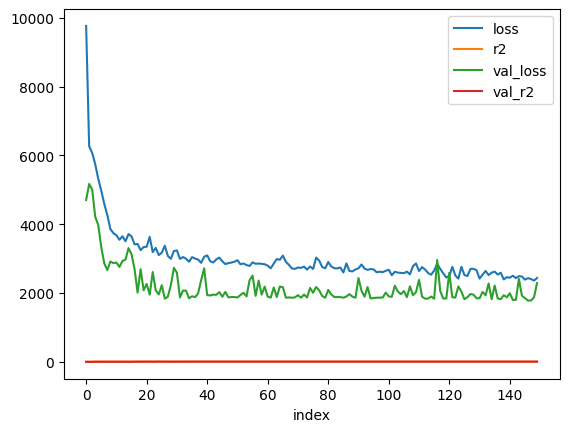

In [ ]:
pd.DataFrame(model.history.history).reset_index().plot('index',kind='line')

<Axes: xlabel='index'>

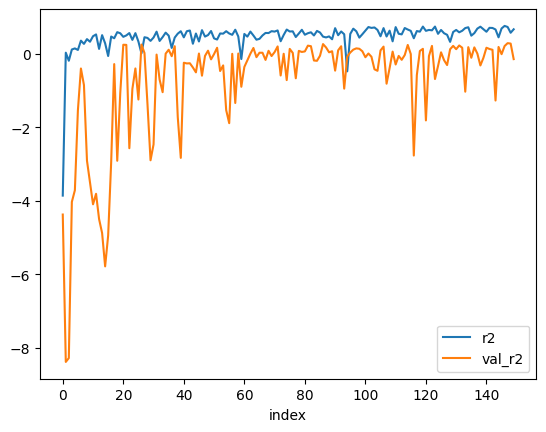

In [ ]:
pd.DataFrame(model.history.history)[["r2","val_r2"]].reset_index().plot('index',kind='line')

In [ ]:
data=pd.DataFrame(hist.history)
data.loc[data["r2"].idxmax()]

loss        2429.784424
r2             0.753218
val_loss    1778.390747
val_r2         0.206433
Name: 146, dtype: float64